In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("seagull.png", cv2.IMREAD_GRAYSCALE)
altura_imagem, largura_imagem = img.shape


In [106]:
def cria_padroes (M):
    padroes = []
    tam = (len(M)*len(M))+1
    for i in range(0,tam):
        padroes.append(np.zeros((len(M), len(M))))
    
    for i in range (0, len(M)):
        for j in range (0, len(M)):
            elem = M[i,j]
            for k in range (elem+1, tam):
                padroes[k][i,j] = 1
    
    
    return padroes

In [117]:
def half_toning(matriz_de_padroes):

    img_out = img
    tam_padrao = len(matriz_de_padroes)
    tam_equalizacao = (tam_padrao**2)-1
    mask = (tam_equalizacao/255.0) * img_out
    mask = np.ceil(mask)
    newImg = np.zeros((altura_imagem*tam_padrao,largura_imagem*tam_padrao))
    padroes = cria_padroes(matriz_de_padroes)
    #padroes = cria_padroes(x)
    #print (p[4] == padroes[4])
    #refere ao x da imagem que esta sendo criada
    k = 0
    #refere ao y da imagem que esta sendo criada
    l = 0
    


    for i in range(0, altura_imagem):
        for j in range(0, largura_imagem):
            val = mask[i,j]
            pattern = padroes[int(val)]
            x_inicio = i + k
            x_fim = x_inicio + tam_padrao
            y_inicio = j + l
            y_fim = y_inicio + tam_padrao
            newImg[x_inicio:x_fim, y_inicio:y_fim] = pattern[:,:]

            l = l + tam_padrao - 1
        l = 0
        k = k + tam_padrao - 1


    #print(len(padroes))

    plt.imshow(newImg, "gray")

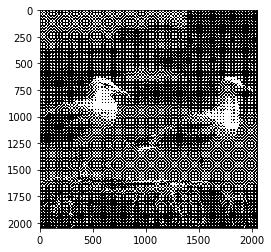

In [118]:
matriz_de_padroes = np.array([[6,8,4],[1,0,3],[5,2,7]])
matriz_de_padroes = np.array([[0,12,3,15],[8,4,11,7],[2,14,1,13], [10,6,9,5]])
half_toning(matriz_de_padroes)